# Trabajo Práctico 2 - Machine Learning
*Felicitas Marolda*

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [32]:
import sys
import os
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src'))

import models as mod
importlib.reload(mod)
import metrics as met
importlib.reload(met)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP2\\Problema1\\src\\preprocessing.py'>

In [33]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

In [34]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

print(cell_diagnosis_dev.describe())
# hacemos un pairplot para ver la distribucion de los datos
# sns.pairplot(cell_diagnosis_dev, hue='CellType', palette='husl')  
# plt.title('Pairplot of Cell Diagnosis Dataset')
# plt.show()

# sns.pairplot(cell_diagnosis_dev_imbalanced, hue='CellType', palette='rocket')
# plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
# plt.show()

       CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
665   66.778177        NaN        1.479206         21.709630      25.674618   
1122  68.525987   0.463420             NaN         21.460395      26.565458   
774   68.208340   0.504642        1.492616         20.514169      24.229625   
927   66.267829   0.514063             NaN         23.157303            NaN   
401   70.938198   0.486708             NaN         21.222001      29.848605   

      CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
665       0.462058     3.427624         2.479049     56.851967   
1122      0.463512     3.446623         2.537901     58.516837   
774       0.470139          NaN         2.494672     60.038952   
927       0.462627     3.537374         2.689156     58.768202   
401       0.471994     2.905750         2.248600     63.221793   

      OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
665                NaN         4.506586            44

In [35]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

importlib.reload(pp)
importlib.reload(mod)

new_df_dev = pp.prepare_df(cell_diagnosis_dev)
new_df_dev_imbalanced = pp.prepare_df(cell_diagnosis_dev_imbalanced)

    CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  63.423148   0.500594        1.473261         23.300222      28.448318   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0      0.477657     3.434832         2.492852         -10.0         78.625935   

   Vascularization  InflammationMarkers  Diagnosis  GeneticMutationBinary  \
0         5.727217            41.158399        0.0                      0   

   Unknown  Epthlial  Mesnchymal  
0        0         1           0  
    CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  67.663374   0.513293        1.483674         22.051707      27.252767   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0       0.47699      3.32595         2.449179     58.451676         79.940819   

   Vascularization  InflammationMarkers  Diagnosis  GeneticMutationBinary  \
0         5.544034            44.252979        0.0                

### Ejercicio 1.2
Implementar una clase de regresión logística binaria con regularización L2. Utilizando el conjunto de datos de desarrollo cell_diagnosis_balanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar el modelo sobre el conjunto de entrenamiento y evaluar su desempeño sobre el conjunto de validación.

Reportar las siguientes métricas de performance:
– Matriz de confusión
– Accuracy
– Precision
– Recall
– F-Score
– Curva Precision-Recall (PR)
– Curva ROC
– AUC-ROC
– AUC-PR

Para ajustar el hiperparámetro de regularización λ, puede utilizar F-Score como métrica de performance.

**NOTA**: Si el modelo se implementa de forma general para clasificación multiclase, el mismo código podrá ser reutilizado en el ejercicio 2.

In [36]:
# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data, val_data = pp.split_data(new_df_dev, 0.2)
print("train_data shape: ", train_data.shape)
print("val_data shape: ", val_data.shape)
# train_X, train_y, features = pp.df_breakDown(train_data, 'Diagnosis')
# val_X, val_y, _ = pp.df_breakDown(val_data, 'Diagnosis')

# print("train_X shape: ", train_X.shape)
# print("train: ", train_X[0])


print("train head: ", train_data.head(1))


train_data shape:  (1330, 17)
val_data shape:  (333, 17)
train head:      CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  63.423148   0.500594        1.473261         23.300222      28.448318   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0      0.477657     3.434832         2.492852         -10.0         78.625935   

   Vascularization  InflammationMarkers  Diagnosis  GeneticMutationBinary  \
0         5.727217            41.158399        0.0                      0   

   Unknown  Epthlial  Mesnchymal  
0        0         1           0  


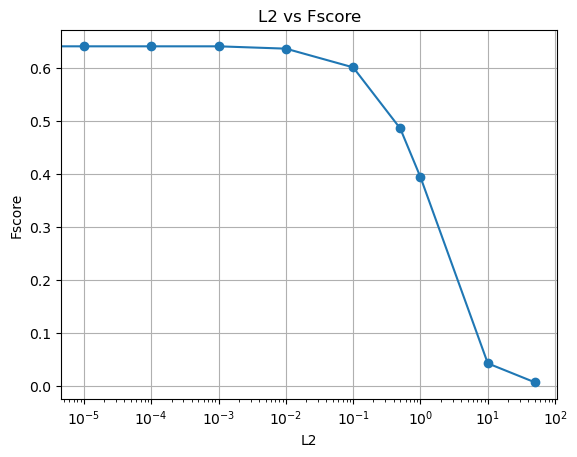

Best L2:  0


In [37]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)
# entrenamos el modelo
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
possible_threshold = [0.0001, 0.01, 0.3, 0.4, 0.5, 0.6, 0.7, 0.99]

best_L2 = pp.cross_validation_for_L2(train_data, possible_L2)
print("Best L2: ", best_L2)

# best_threshold = pp.cross_validation_for_threshold(train_data, best_L2, possible_threshold)
# print("Best threshold: ", best_threshold)

# X_train, y_train, features = pp.df_breakDown(train_data, y='Diagnosis')
# X_val, y_val, _ = pp.df_breakDown(val_data, y='Diagnosis')

# print("Distribución de Diagnosis en train:")
# print(X_train_fold['Diagnosis'].value_counts())

# X_train = pp.normalization(X_train, X_train.mean(), X_train.std())
# X_val = pp.normalization(X_val, X_train.mean(), X_train.std())

# model = mod.Logistic_Regression(X_train, y_train, features, 0.1, 0.5)

In [38]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)

X_train, y_train, features = pp.df_breakDown(train_data, y='Diagnosis')
X_val, y_val, _ = pp.df_breakDown(val_data, y='Diagnosis')

# print("Distribución de Diagnosis en train:")
# print(X_train_fold['Diagnosis'].value_counts())

X_train = pp.normalization(X_train, X_train.mean(), X_train.std())
X_val = pp.normalization(X_val, X_train.mean(), X_train.std())

model = mod.Logistic_Regression(X_train, y_train, features, best_L2, 0.5)
model_prediciton = model.predict(X_val)
model_proba = model.predict_proba(X_val)
# print(model.coef)

===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.855856   0.852459 0.776119    0.8125 0.897529 0.838031


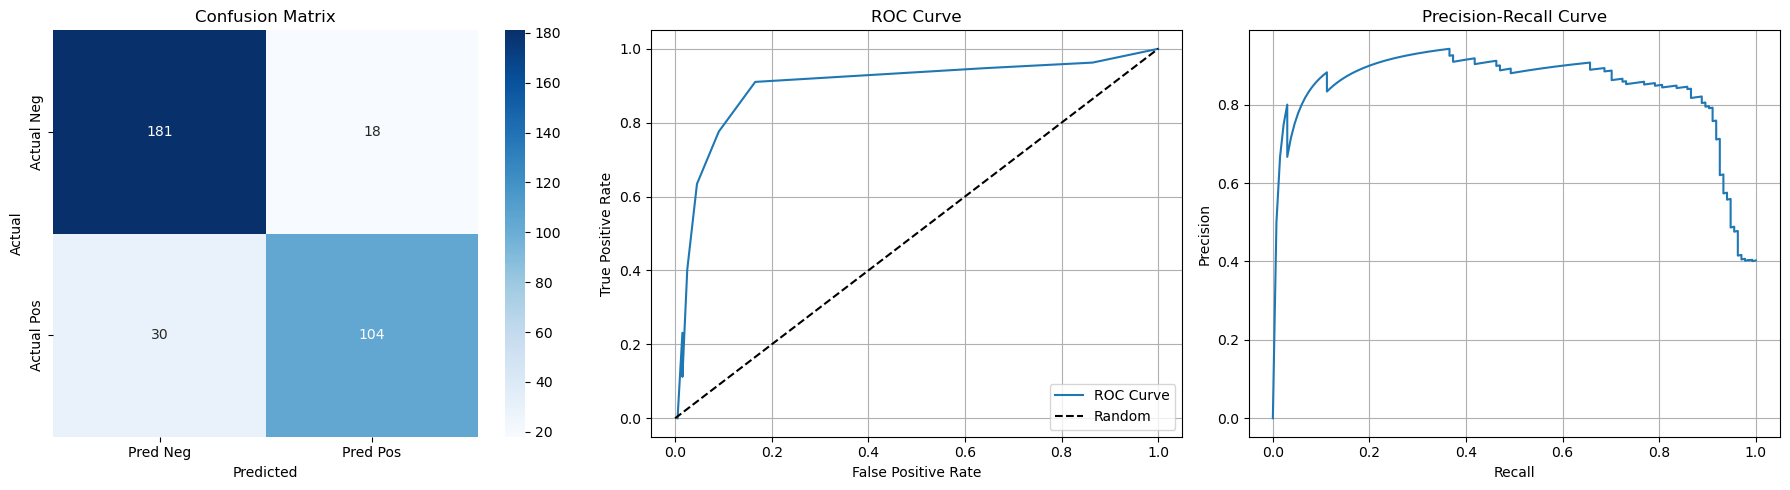

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
0,0.855856,0.852459,0.776119,0.8125,0.897529,0.838031


In [39]:
importlib.reload(met)

met.get_metrics(y_val, model_prediciton, model_proba)

# print("Fscore: ", met.f_score(y_val, model_prediciton))
# print("Precision: ", met.precision(y_val, model_prediciton))
# print("Recall: ", met.recall(y_val, model_prediciton))
# print("Accuracy: ", met.accuracy(y_val, model_prediciton))
# TP, TN, FP, FN = met.confusion_matrix(y_val, model_prediciton)
# # print("TP: ", TP, "\nTN: ", TN, "\nFP: ", FP, "\nFN: ", FN)
# met.draw_confusion_matrix(TP, TN, FP, FN)
# print("AUC-ROC: ", met.AUC_ROC(y_val, model_proba))
# # met.draw_AUC_ROC(y_val, model_val)
# print("AUC-PR: ", met.AUC_PR(y_val, model_proba))
# # print("curve ROC: ", met.curve_ROC(y_val, model_val))
# met.draw_ROC_curve(y_val, model_proba)
# print("curve precision recall: ", met.curve_precision_recall(y_val, model_proba))
# met.draw_precision_recall_curve(y_val, model_proba)

### Ejercicio 1.3

Utilizando el conjunto de datos de test cell_diagnosis_balanced_test.csv, evalúe la performance del modelo desarrollado anteriormente computando las métricas de performance indicadas en el inciso 1.2.

===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.864865   0.891892 0.795181  0.840764 0.874262 0.792039


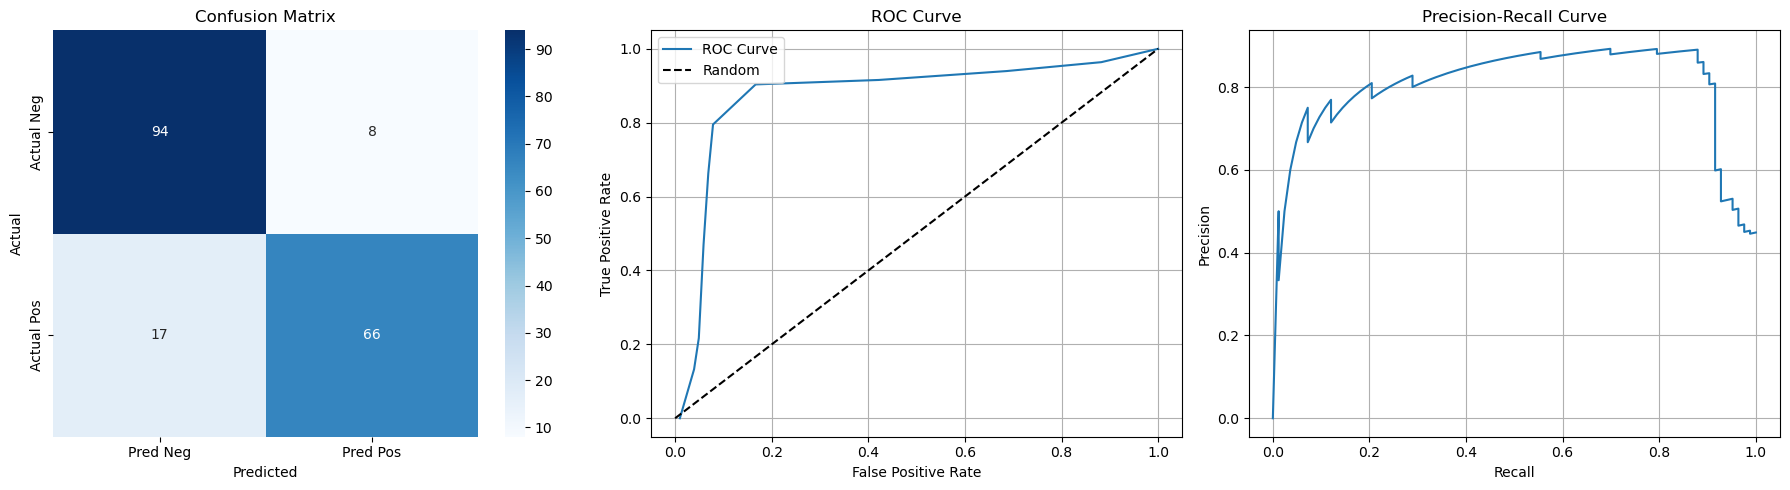

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
0,0.864865,0.891892,0.795181,0.840764,0.874262,0.792039


In [40]:
importlib.reload(met)
importlib.reload(pp)
importlib.reload(mod)


cell_diagnosis_test_ = pp.prepare_df_test(cell_diagnosis_test, new_df_dev)
X_train_imb, y_train_imb, features = pp.df_breakDown(cell_diagnosis_test_, y='Diagnosis')

X_train_imb = pp.normalization(X_train_imb, X_train.mean(), X_train.std())

model_prediciton_test = model.predict(X_train_imb)
model_prediction_proba_test = model.predict_proba(X_train_imb)

met.get_metrics(y_train_imb, model_prediciton_test, model_prediction_proba_test)

# print("Fscore: ", met.f_score(y_test, model_prediciton_test))
# print("Precision: ", met.precision(y_test, model_prediciton_test))
# print("Recall: ", met.recall(y_test, model_prediciton_test))
# print("Accuracy: ", met.accuracy(y_test, model_prediciton_test))
# TP, TN, FP, FN = met.confusion_matrix(y_test, model_prediciton_test)
# met.draw_confusion_matrix(TP, TN, FP, FN)
# # met.draw_AUC_ROC(y_val_imb, model_val_imb)
# print("AUC-PR: ", met.AUC_PR(y_test, model_prediction_proba_test))
# met.draw_ROC_curve(y_test, model_prediction_proba_test)
# print("curve precision recall: ", met.curve_precision_recall(y_test, model_prediction_proba_test))
# met.draw_precision_recall_curve(y_test, model_prediction_proba_test)

### Ejercicio 1.4: Rebalanceo de Clases en Conjuntos Desbalanceados

Utilizando el conjunto de datos de desarrollo cell_diagnosis_imbalanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar distintos modelos de regresión logística binaria con regularización L2, aplicando una técnica de re-balanceo distinta en cada caso:

1) Sin rebalanceo: entrenar el modelo directamente sobre los datos desbalanceados.
2) Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.
3) Oversampling mediante duplicación: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporción.
4) Oversampling mediante SMOTE (Synthetic Minority Oversampling Technique): hasta que ambas clases tengan igual proporción.
5) Cost re-weighting: en la función de costo, multiplicar los terminos que dependen de las muestras de la clase minoritaria por un factor C = π2/π1 , donde π1 es la probabilidad a-priori de la clase minoritoria y π2 el de la clase mayoritaria. Esto efectivamente re-balancea la importancia de tener errores de clasificacion de ambas clases.

Evalúe el desempeño de cada modelo sobre el conjunto de validación utilizando las métricas indicadas en el inciso 1.2. Para las curvas PR y ROC, grafique las curvas de cada modelo sobre el mismo grafico, de manera de poder comparar las características de cada uno. Para las metricas de performance escalares, ponga los resultados de cada modelo en una sola tabla, como se muestra a continuación $tabla en consigna$.

Para ajustar el hiperparámetro de regularización puede utilizar F-Score como
métrica de performance.


In [61]:
importlib.reload(met)
importlib.reload(pp)
importlib.reload(mod)

# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data_imb, val_df_imb = pp.split_data(new_df_dev_imbalanced, 0.2)

X_train_imb, y_train_imb, features = pp.df_breakDown(train_data_imb, y='Diagnosis')
X_val_imb, y_val_imb, _ = pp.df_breakDown(val_df_imb, y='Diagnosis')


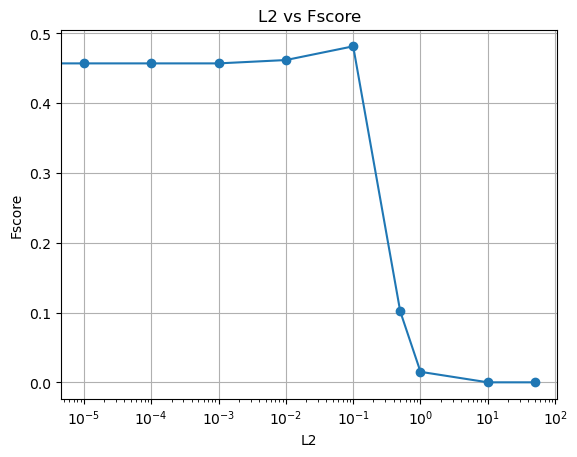

Best L2:  0.1
===== MÉTRICAS =====
 Accuracy  Precision  Recall  F1-score  AUC-ROC   AUC-PR
     0.75          0     0.0         0 0.505285 0.585146


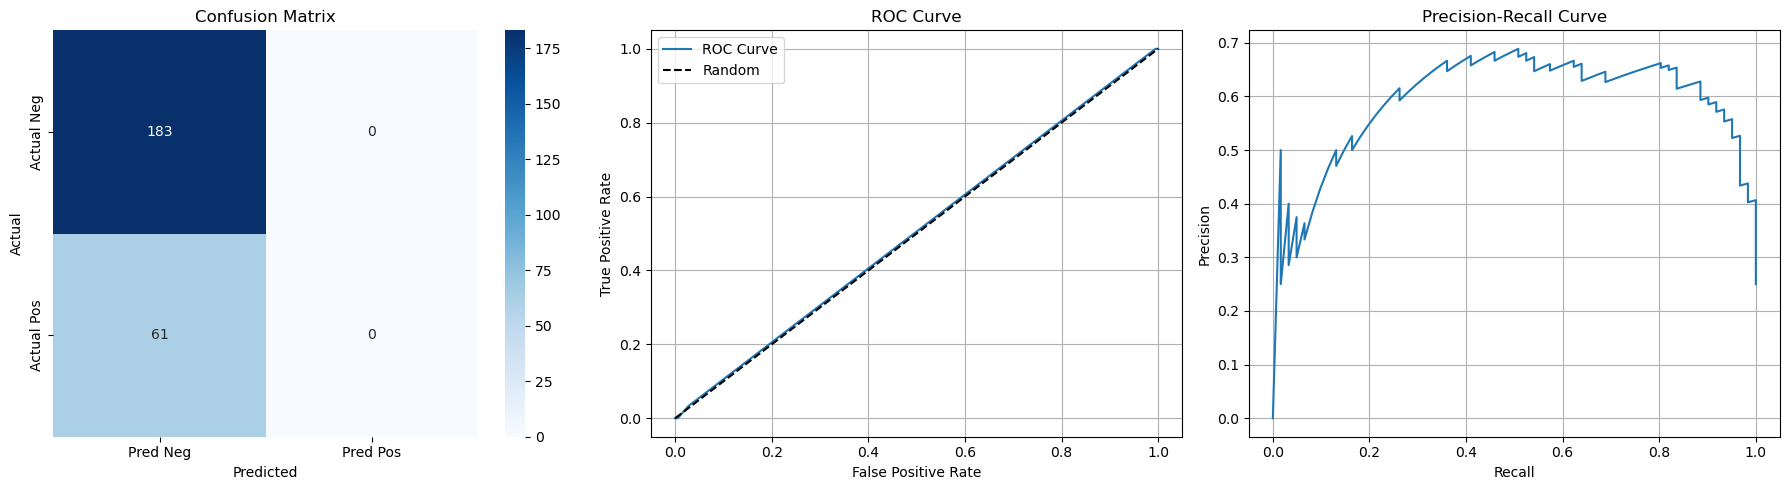

In [63]:
# sin rebalanceo
best_L2_sin_rebalanceo = pp.cross_validation_for_L2(train_data_imb, possible_L2)
print("Best L2: ", best_L2_sin_rebalanceo)

X_train_sin_rebalanceo = pp.normalization(X_train_imb, X_train_imb.mean(), X_train_imb.std())
X_val_sin_rebalanceo = pp.normalization(X_val_imb, X_train_imb.mean(), X_train_imb.std())

model_sin_rebalanceo = mod.Logistic_Regression(X_train_sin_rebalanceo, y_train_imb, features, best_L2_sin_rebalanceo, 0.5)
model_prediciton_sin_rebalanceo = model_sin_rebalanceo.predict(X_val_sin_rebalanceo)
model_proba_sin_rebalanceo = model_sin_rebalanceo.predict_proba(X_val_sin_rebalanceo)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediciton_sin_rebalanceo, model_proba_sin_rebalanceo)

metrics_sin_rebalanceo = met.get_numeric_metrics(y_val_imb, model_prediciton_sin_rebalanceo, model_proba_sin_rebalanceo)
metrics_for_graphing_sin_rebalanceo = met.get_metrics_for_graphing(y_val_imb, model_prediciton_sin_rebalanceo, model_proba_sin_rebalanceo)

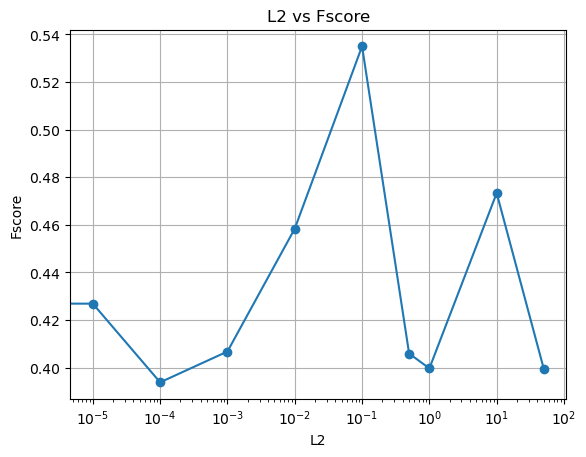

Best L2:  0.1
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.856557   0.666667 0.852459  0.748201 0.850085 0.622172


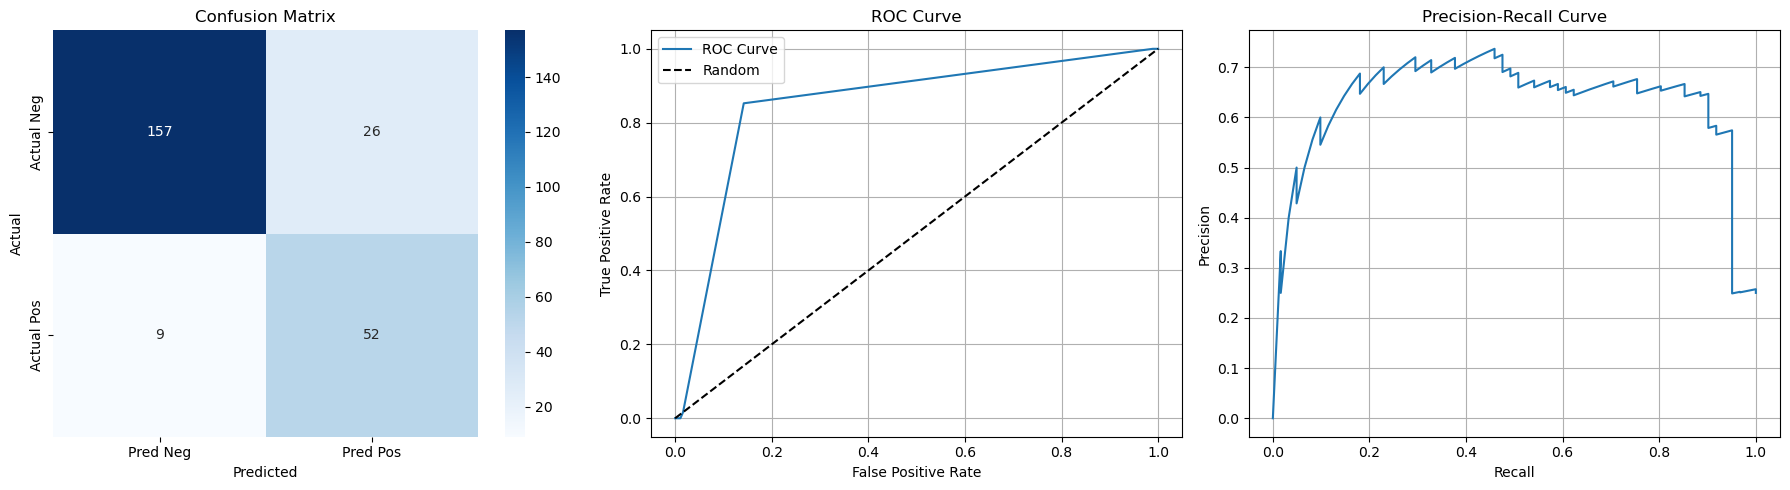

In [64]:
# Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.
importlib.reload(pp)
importlib.reload(met)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_undersampling = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "undersampling")
print("Best L2: ", best_L2_undersampling)

# hacemos undersampling a train
X_train_undersampling_bal, y_train_undersampling_bal = pp.undersampling(X_train_imb, y_train_imb)

X_train_undersampling = pp.normalization(X_train_undersampling_bal, X_train_undersampling_bal.mean(), X_train_undersampling_bal.std())
X_val_undersampling = pp.normalization(X_val_imb, X_train_undersampling_bal.mean(), X_train_undersampling_bal.std())

model_undersampling = mod.Logistic_Regression(X_train_undersampling, y_train_undersampling_bal, features, best_L2_undersampling, 0.5)
model_prediciton_undersamling = model_undersampling.predict(X_val_undersampling)
model_proba_undersampling = model_undersampling.predict_proba(X_val_undersampling)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediciton_undersamling, model_proba_undersampling)

metrics_undersampling = met.get_numeric_metrics(y_val_imb, model_prediciton_undersamling, model_proba_undersampling)
metrics_for_graphing_undersampling = met.get_metrics_for_graphing(y_val_imb, model_prediciton_undersamling, model_proba_undersampling)

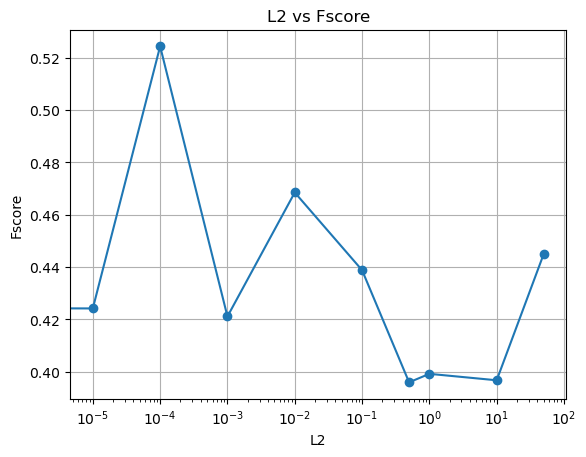

Best L2:  0.0001
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.844262   0.694915 0.672131  0.683333 0.784959 0.630528


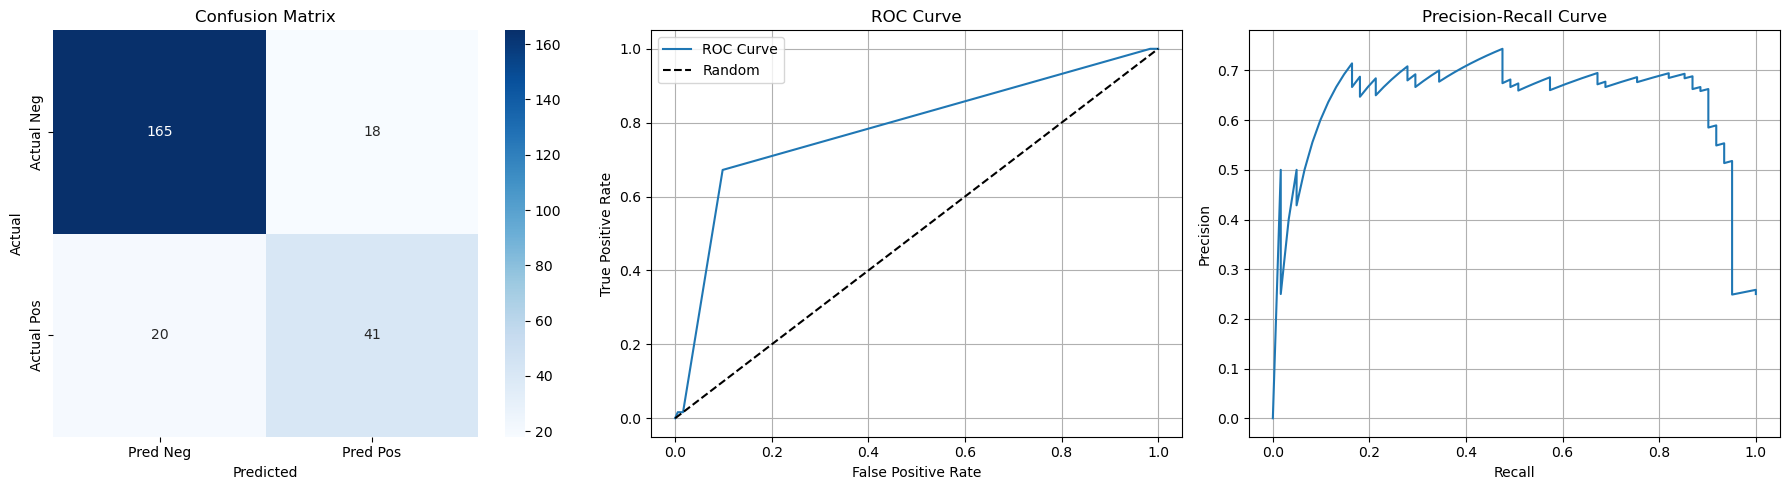

In [65]:
# Oversampling mediante duplicación: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporciónimportlib.reload(pp)
importlib.reload(pp)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_oversampling_dup = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "oversampling mediante duplicación")
print("Best L2: ", best_L2_oversampling_dup)

# hacemos oversampling a train
X_train_oversampling_dup_bal, y_train_oversampling_dup_bal = pp.oversampling_duplication(X_train_imb, y_train_imb)

X_train_oversampling_dup = pp.normalization(X_train_oversampling_dup_bal, X_train_oversampling_dup_bal.mean(), X_train_oversampling_dup_bal.std())
X_val_oversampling_dup = pp.normalization(X_val_imb, X_train_oversampling_dup_bal.mean(), X_train_oversampling_dup_bal.std())

model_oversampling_dup = mod.Logistic_Regression(X_train_oversampling_dup, y_train_oversampling_dup_bal, features, best_L2_oversampling_dup, 0.5)
model_prediction_oversampling_dup = model_oversampling_dup.predict(X_val_oversampling_dup)
model_proba_oversampling_dup = model_oversampling_dup.predict_proba(X_val_oversampling_dup)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_oversampling_dup, model_proba_oversampling_dup)

metrics_oversampling_dup = met.get_numeric_metrics(y_val_imb, model_prediction_oversampling_dup, model_proba_oversampling_dup)
metrics_for_graphing_oversampling_dup = met.get_metrics_for_graphing(y_val_imb, model_prediction_oversampling_dup, model_proba_oversampling_dup)

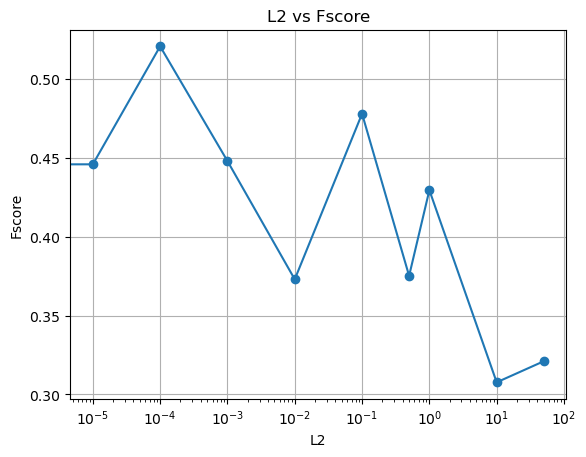

Best L2:  0.0001
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.848361   0.662162 0.803279  0.725926 0.830556 0.631766


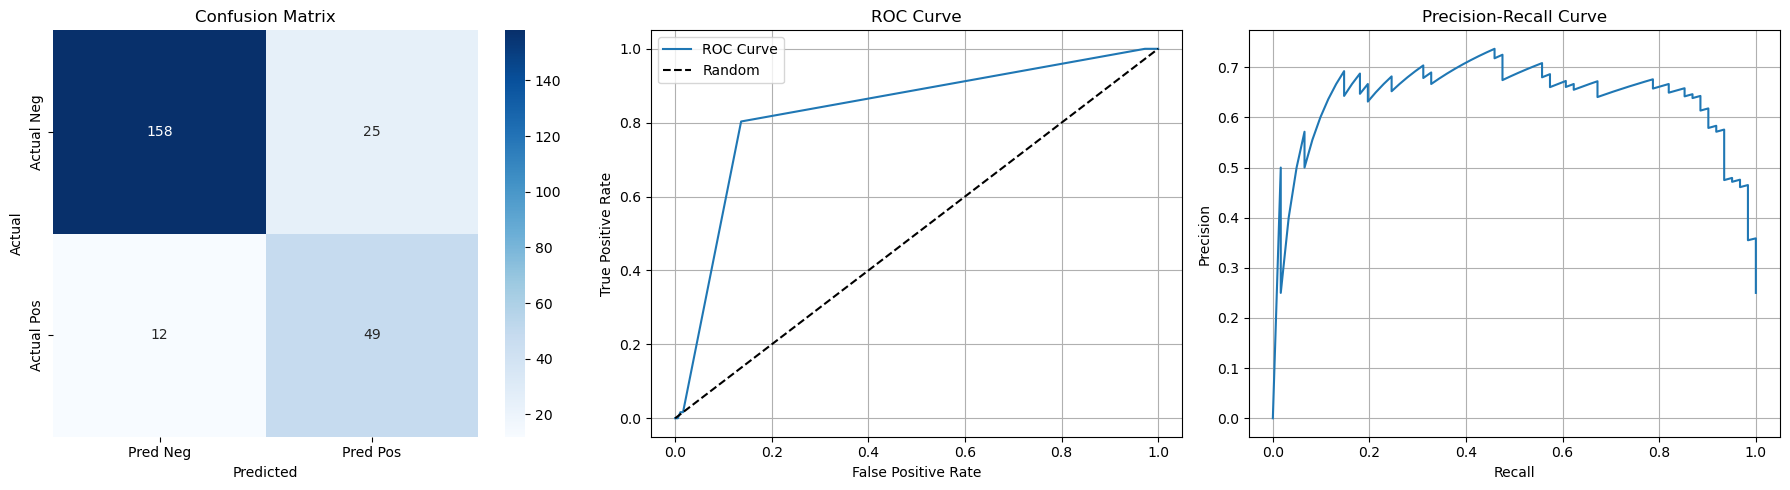

In [66]:
# Oversampling mediante SMOTE (Synthetic Minority Oversampling Technique):hasta que ambas clases tengan igual proporción.
# Oversampling mediante duplicación: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporciónimportlib.reload(pp)
importlib.reload(pp)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_SMOTE = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "oversampling mediante SMOTE")
print("Best L2: ", best_L2_SMOTE)

# hacemos oversampling a train
X_train_SMOTE_bal, y_train_SMOTE_bal = pp.oversampling_SMOTE(X_train_imb, y_train_imb)

X_train_SMOTE = pp.normalization(X_train_SMOTE_bal, X_train_SMOTE_bal.mean(), X_train_SMOTE_bal.std())
X_val_SMOTE = pp.normalization(X_val_imb, X_train_SMOTE_bal.mean(), X_train_SMOTE_bal.std())

model_SMOTE = mod.Logistic_Regression(X_train_SMOTE, y_train_SMOTE_bal, features, best_L2_SMOTE, 0.5)
model_prediction_SMOTE = model_SMOTE.predict(X_val_SMOTE)
model_proba_SMOTE = model_SMOTE.predict_proba(X_val_SMOTE)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_SMOTE, model_proba_SMOTE)

metrics_SMOTE = met.get_numeric_metrics(y_val_imb, model_prediction_SMOTE, model_proba_SMOTE)
metrics_for_graphing_SMOTE = met.get_metrics_for_graphing(y_val_imb, model_prediction_SMOTE, model_proba_SMOTE)

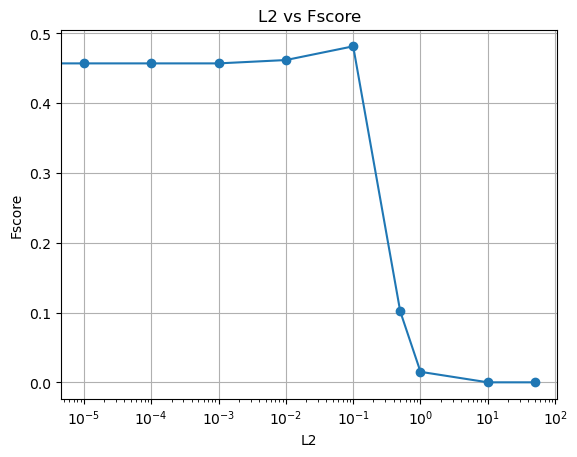

Best L2:  0.1
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.836066   0.690909 0.622951  0.655172 0.762743 0.630965


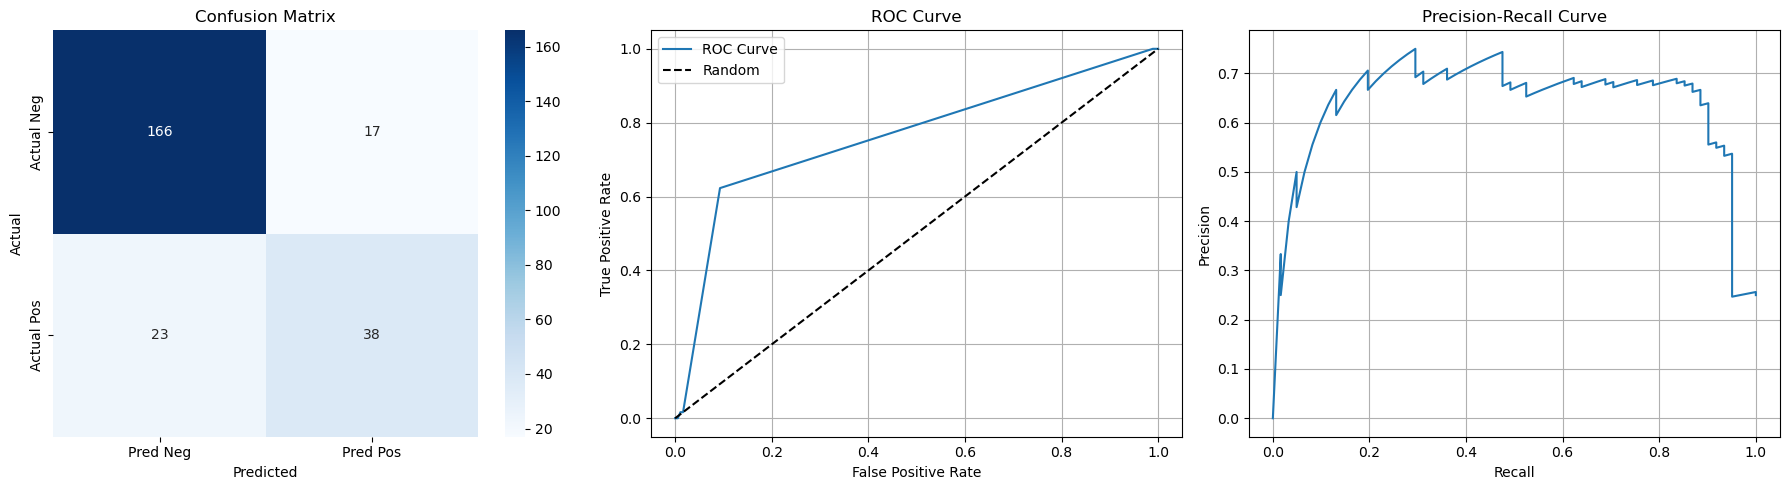

In [67]:
# Cost re weighing
importlib.reload(pp)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_cost_rw = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "oversampling mediante cost re-weighing")
print("Best L2: ", best_L2_cost_rw)

# hacemos oversampling a train
X_train_cost_rw_bal, y_train_cost_rw_bal = pp.oversampling_SMOTE(X_train_imb, y_train_imb)

X_train_cost_rw = pp.normalization(X_train_cost_rw_bal, X_train_cost_rw_bal.mean(), X_train_cost_rw_bal.std())
X_val_cost_rw = pp.normalization(X_val_imb, X_train_cost_rw_bal.mean(), X_train_cost_rw_bal.std())

model_cost_rw = mod.Logistic_Regression(X_train_cost_rw, y_train_cost_rw_bal, features, best_L2_cost_rw, 0.5)
model_prediction_cost_rw = model_cost_rw.predict(X_val_cost_rw)
model_proba_cost_rw = model_cost_rw.predict_proba(X_val_cost_rw)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_cost_rw, model_proba_cost_rw)

metrics_cost_rw = met.get_numeric_metrics(y_val_imb, model_prediction_cost_rw, model_proba_cost_rw)
metrics_for_graphing_cost_rw= met.get_metrics_for_graphing(y_val_imb, model_prediction_cost_rw, model_proba_cost_rw)

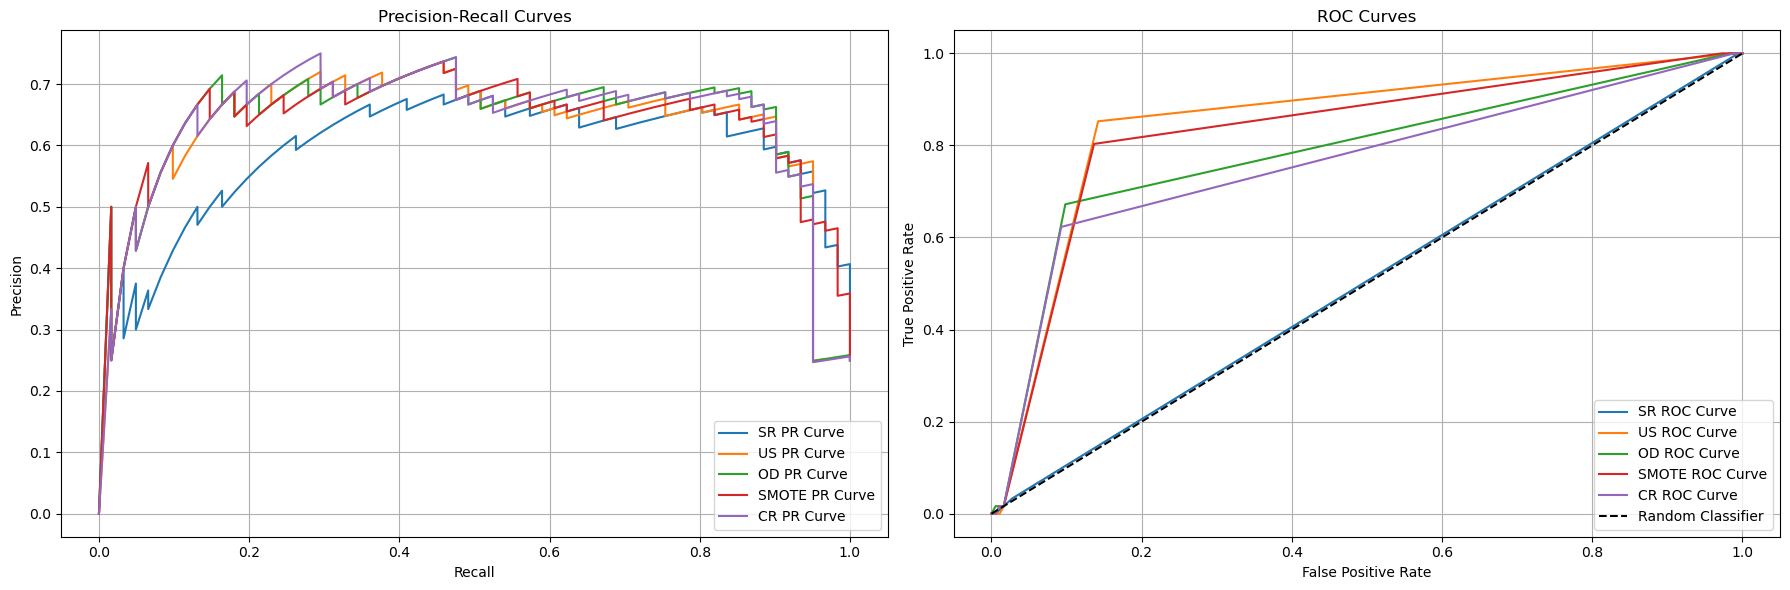

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
SR,0.750000,0.000000,0.000000,0.000000,0.505285,0.585146
US,0.856557,0.666667,0.852459,0.748201,0.850085,0.622172
OD,0.844262,0.694915,0.672131,0.683333,0.784959,0.630528
SMOTE,0.848361,0.662162,0.803279,0.725926,0.830556,0.631766
CR,0.836066,0.690909,0.622951,0.655172,0.762743,0.630965


In [71]:
# todas juntas
importlib.reload(met)

met.graph_all_metrics_rebalanced(
    metrics_sin_rebalanceo,
    metrics_undersampling,
    metrics_oversampling_dup,
    metrics_SMOTE,
    metrics_cost_rw,
    metrics_for_graphing_sin_rebalanceo,
    metrics_for_graphing_undersampling,
    metrics_for_graphing_oversampling_dup,
    metrics_for_graphing_SMOTE,
    metrics_for_graphing_cost_rw
)

# Ejercicio 2: Predicción de Rendimiento de Jugadores de Basketball

Los archivos WAR_class_dev.csv y WAR_class_test.csv tienen los datos de distintos jugadores de basketball recopilados a lo largo de varias temporadas. Los features indican diversas métricas individuales para cada jugador. La variable objetivo es WAR_class, donde WAR son las siglas de una métrica llamada Wins Above Replacement (“Victorias Por Encima de Suplencias”), que mide el impacto de un jugador en términos de partidos ganados por encima de lo que aportaría un jugador suplente promedio.

El objetivo es desarrollar distintos modelos predictivos para estimar la probabilidad de que un jugador pertenezca a una de las tres clases definidas en la columna war_class: Negative WAR, Null WAR o Positive WAR, que corresponden a las clases 1, 2 y 3 respectivamente.

El resto de las features presentes están explicadas en el archivo WAR_class.md.

### Ejercicio 2.1
Conducir un análisis exploratorio sobre los datos en WAR_class_dev.csv. Visualice la distribución de las variables y de la variable objetivo. Verifique si hay valores faltantes (NaN), datos duplicados o desbalanceo entre clases. Analice también la posible presencia de correlaciones fuertes entre los features. (Pandas Cheat Sheet)

In [46]:
WAR_class_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/data/raw/WAR_class_dev.csv')
WAR_class_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/data/raw/WAR_class_test.csv')

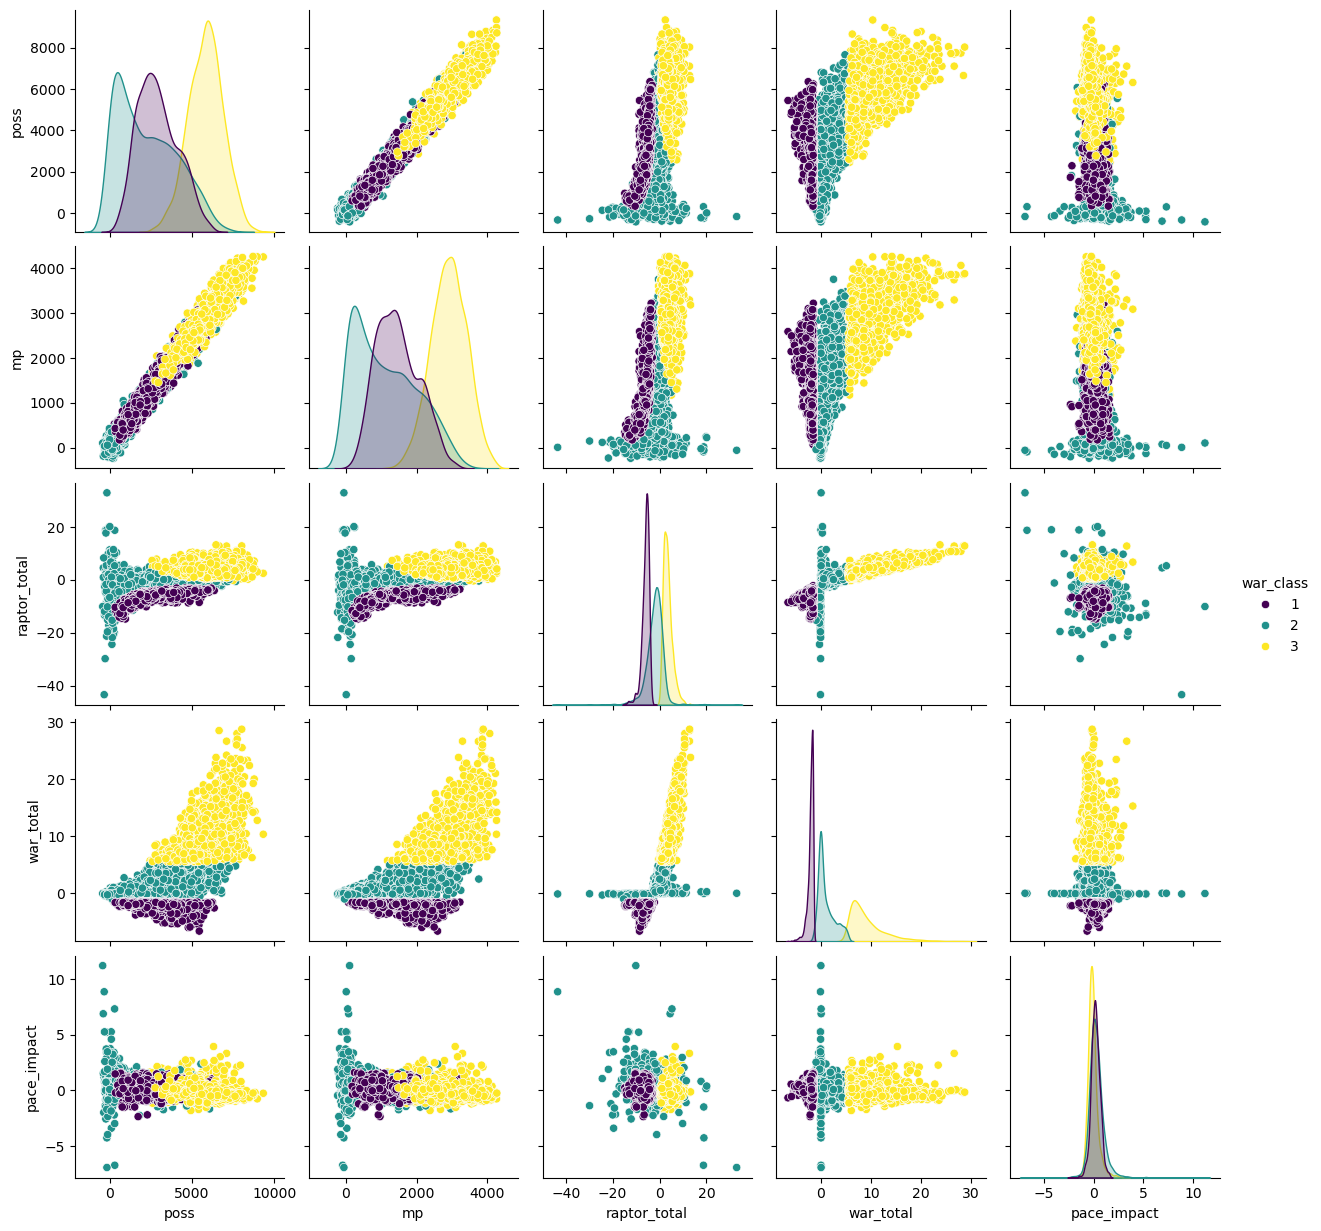

                  poss        mp  raptor_total  war_total  pace_impact  \
poss          1.000000  0.984420      0.641996   0.719457    -0.335821   
mp            0.984420  1.000000      0.646959   0.726412    -0.341906   
raptor_total  0.641996  0.646959      1.000000   0.854540    -0.257449   
war_total     0.719457  0.726412      0.854540   1.000000    -0.215636   
pace_impact  -0.335821 -0.341906     -0.257449  -0.215636     1.000000   
war_class     0.564286  0.567405      0.810724   0.865727    -0.168358   

              war_class  
poss           0.564286  
mp             0.567405  
raptor_total   0.810724  
war_total      0.865727  
pace_impact   -0.168358  
war_class      1.000000  


In [47]:
# hacemos un pairplot
sns.pairplot(WAR_class_dev, hue='war_class', palette='viridis')
# plt.title('Pairplot of WAR Class Dataset')
plt.show()

correlaciones = WAR_class_dev.corr(numeric_only=True)
print(correlaciones)


In [48]:
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/src'))
import preprocessing2 as pp2
importlib.reload(pp2)
import models2 as mod2
importlib.reload(mod2)
import metrics2 as met2
importlib.reload(met2)

<module 'metrics2' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP2\\Problema2\\src\\metrics2.py'>

In [49]:
importlib.reload(pp2)
war_dev = pp2.prepare_df(WAR_class_dev)
war_dev = pp2.feature_engineering(war_dev)

### Ejercicio 2.2
Implementar las siguientes tres arquitecturas, adecuadas para la tarea de clasificación:
1) Análisis discriminante lineal (Linear Discriminant Analysis, LDA).
2) Regresión logística multi-clase. Recuerde que puede agregar regularización.
3) Bosque aleatorio (Random Forest) utilizando la entropía como criterio de división.

Se recomienda experimentar con diferentes configuraciones de hiperparámetros (número de árboles, profundidad máxima, etc.). Luego, se podrá seleccionar la mejor combinación en función de los resultados obtenidos.

In [50]:
importlib.reload(pp2)
train_data_war, val_data_war = pp2.split_data(war_dev, 0.2)

In [51]:
# LDA búsqueda de hiperparámetros


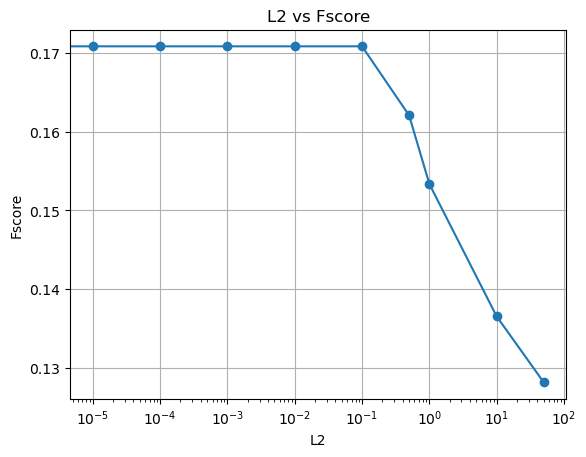

Best L2:  0


In [52]:
# Logistic regression multiclase búsqueda de hiperparámetros
importlib.reload(mod2)
importlib.reload(pp2)
importlib.reload(met2)

possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
possible_threshold = [0.0001, 0.01, 0.3, 0.4, 0.5, 0.6, 0.7, 0.99]

best_L2_war = pp2.cross_validation_for_LogisticReg(train_data_war, possible_L2)
print("Best L2: ", best_L2_war)



In [53]:
# random forest búsqueda de hiperparámetros

importlib.reload(mod2)
importlib.reload(pp2)



<module 'preprocessing2' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP2\\Problema2\\src\\preprocessing2.py'>